# Generate parameter search plots for HGDP

In [11]:
import os
import sys
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap import UMAP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import phate
import scprep
from dm import DiffusionMap
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Add src directory to the Python path
sys.path.append(os.path.join(project_root, "src"))
from HGDP_utils import load_data_HGDP

In [12]:
# define paths
DATA_PATH = "/home/mila/s/shuang.ni/scratch/phate_genetics/data/HGDP+1KGP/V4"
SAVE_PATH = "/home/mila/s/shuang.ni/scratch/phate_genetics/results/HGDP+1KGP"
Figure_PATH = SAVE_PATH + "/figures"

# load data and labels and precomputed PCs

In [13]:
metadata, relatedness, data, mapping_info = load_data_HGDP(DATA_PATH)
cmap_genetic_region, cmap_pop= mapping_info

In [14]:
# filter data
filters = ["filter_pca_outlier", "hard_filtered", "filter_contaminated"]
_filtered_indices = metadata[metadata[filters].any(axis=1)].index
filtered_indices = ~metadata.index.isin(_filtered_indices)
data = data[filtered_indices]
metadata = metadata[filtered_indices]
# get filterted lables
label_genetic_region = metadata['Genetic_region_merged'].values
label_pop = metadata['Population'].values


In [15]:
# load embeddings from txt
inputs = np.loadtxt(SAVE_PATH + "/PCA_50D.txt")
phate_emb_2d = np.loadtxt(SAVE_PATH + "/PHATE_2D.txt")
umap_emb_2d = np.loadtxt(SAVE_PATH + "/UMAP_2D.txt")
tsne_emb_2d = np.loadtxt(SAVE_PATH + "/tSNE_2D.txt")
diffusion_emb_2d = np.loadtxt(SAVE_PATH + "/PHATE_2D.txt")
repulsion_emb_2d = np.loadtxt(SAVE_PATH + "/PHATE_2D.txt")

# sweep on knn

In [16]:
Ks=[5, 25, 50, 100, 200, 300, 500, 1000]
t = 15
gamma = 1
phate_embs_k = []
for i, K in enumerate(Ks):
    phate_operator = phate.PHATE(random_state=42, knn=K, t=t, n_pca=None, n_landmark=None, verbose=0, gamma=gamma)
    phate_emb = phate_operator.fit_transform(inputs)
    phate_embs_k.append(phate_emb)



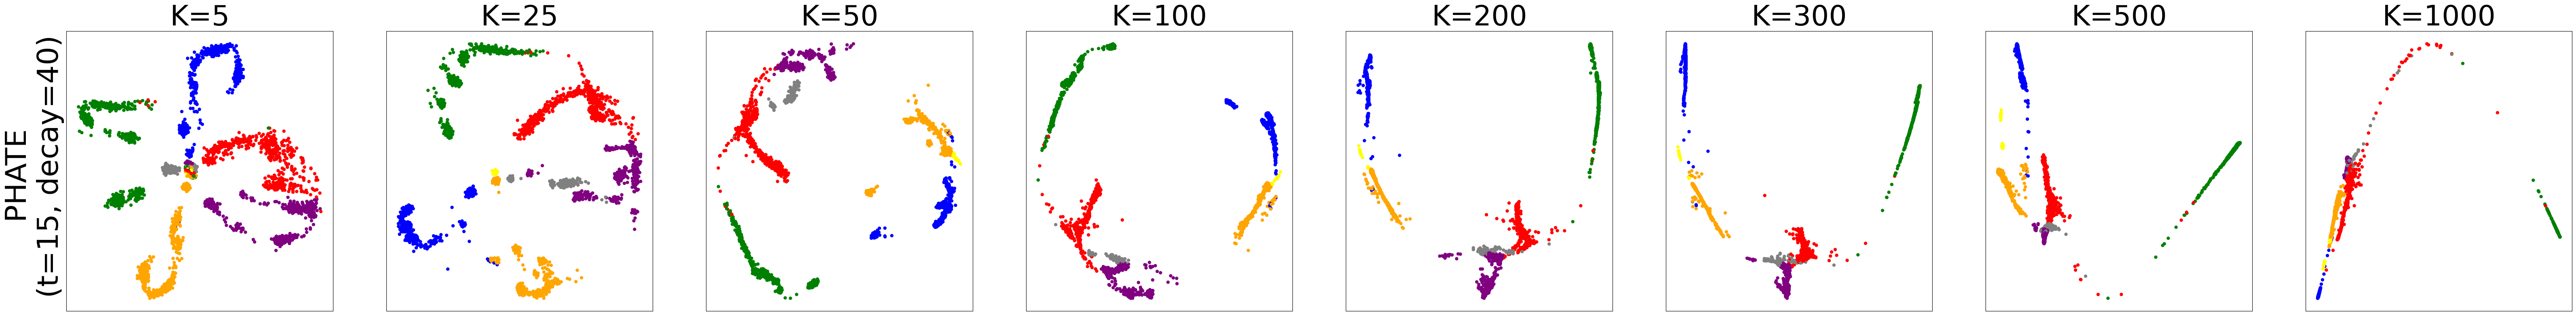

In [17]:
fig, ax = plt.subplots(ncols=len(Ks), nrows=1, figsize=(10*len(Ks), 9))

# Plot the embeddings for each method and subset size
for i, K in enumerate(Ks):   
    if i == 0:
        scprep.plot.scatter2d(phate_embs_k[i], s=25, ax=ax[i], c=label_genetic_region, cmap=cmap_genetic_region, 
                              xticks=False, yticks=False, legend=False, ylabel=f'PHATE \n (t={t}, decay=40)', fontsize=36)
    else:
        scprep.plot.scatter2d(phate_embs_k[i], s=25, ax=ax[i], c=label_genetic_region, cmap=cmap_genetic_region, 
                              xticks=False, yticks=False, legend=False, fontsize=36)

# Add labels for each row
for i, K in enumerate(Ks):
    ax[i].set_title('K={}'.format(K), fontsize=50) 

plt.savefig(Figure_PATH+'/HGDP_phate_k.png', format='png', bbox_inches='tight', dpi=300)

# sweep on t

In [18]:
Ts=[3, 5, 10, 15, 25, 40, 80, 150]
K = 100
gamma = 1
phate_embs_t = []
for i, t in enumerate(Ts):
    phate_operator = phate.PHATE(random_state=42, knn=K, t=t, n_pca = None, n_landmark=None, verbose=0, gamma=gamma)
    phate_emb = phate_operator.fit_transform(inputs)
    phate_embs_t.append(phate_emb)

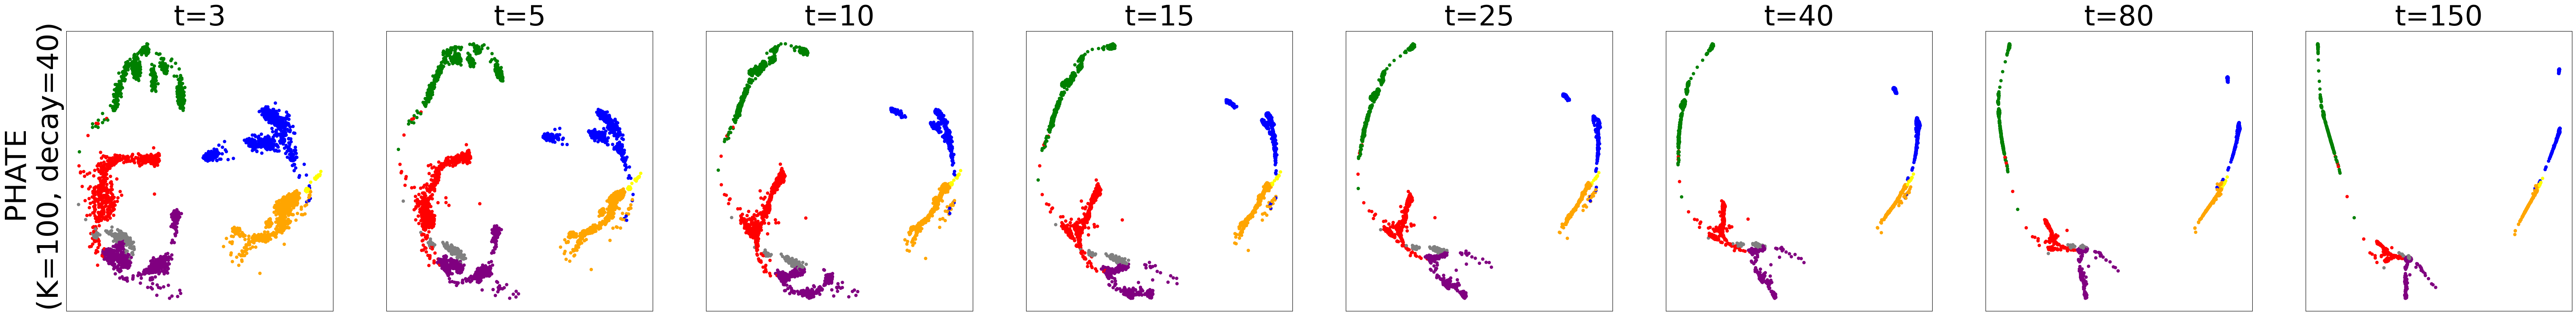

In [19]:
fig, ax = plt.subplots(ncols=len(Ts), nrows=1, figsize=(10*len(Ts), 9))

# Plot the embeddings for each method and subset size
for i, t in enumerate(Ts):   
    if i == 0:
        scprep.plot.scatter2d(phate_embs_t[i], s=25, ax=ax[i], c=label_genetic_region, cmap=cmap_genetic_region, 
                              xticks=False, yticks=False, legend=False, ylabel=f'PHATE \n (K={K}, decay=40)', fontsize=36)
    else:
        scprep.plot.scatter2d(phate_embs_t[i], s=25, ax=ax[i], c=label_genetic_region, cmap=cmap_genetic_region, 
                              xticks=False, yticks=False, legend=False, fontsize=36)

# Add labels for each row
for i, t in enumerate(Ts):
    ax[i].set_title('t={}'.format(t), fontsize=50) 

plt.savefig(Figure_PATH+'/HGDP_phate_t.png', format='png', bbox_inches='tight', dpi=300)

## sweep on decay

In [9]:
Ds=[3,5,10, 15, 25, 40, 80, 150]
K = 100
t = 15
phate_embs_d = []
gamma = 1
for i, decay in enumerate(Ds):
    phate_operator = phate.PHATE(random_state=42, knn=K, t=t, n_pca = None, decay=decay, n_landmark=None, verbose=0, gamma=gamma)
    phate_emb = phate_operator.fit_transform(inputs)
    phate_embs_d.append(phate_emb)

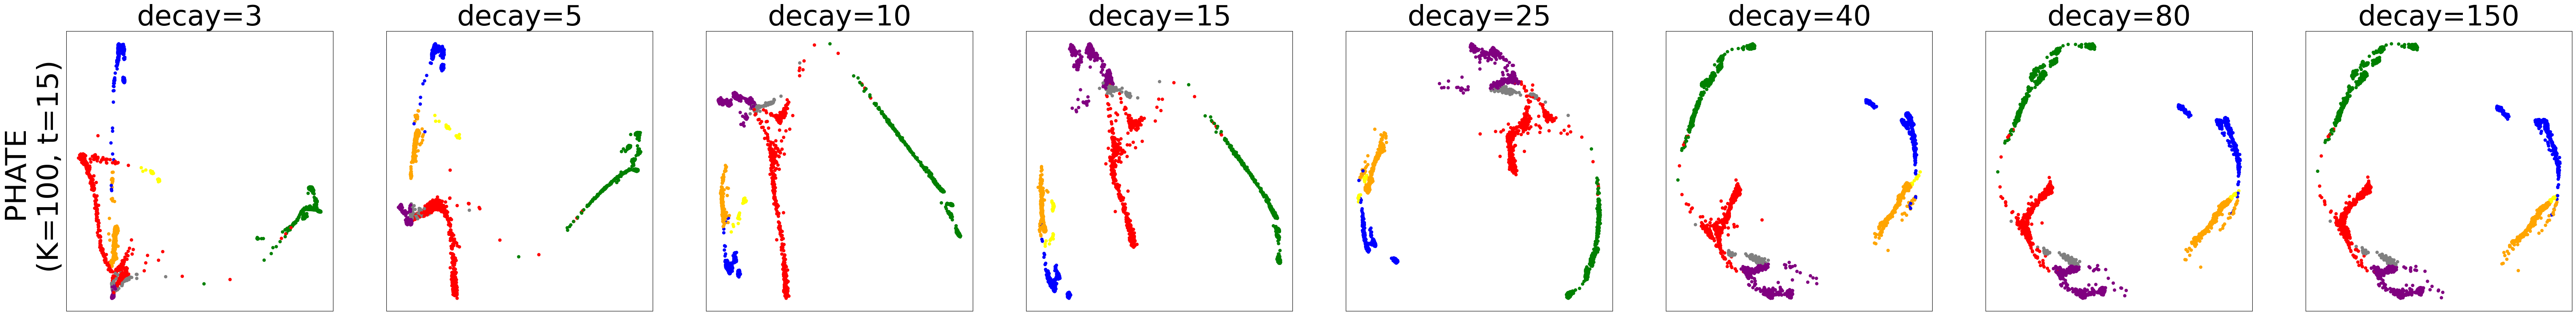

In [10]:
fig, ax = plt.subplots(ncols=len(Ds), nrows=1, figsize=(10*len(Ds), 9))

# Plot the embeddings for each method and subset size
for i, decay in enumerate(Ds):   
    if i == 0:
        scprep.plot.scatter2d(phate_embs_d[i], s=25, ax=ax[i], c=label_genetic_region, cmap=cmap_genetic_region, 
                              xticks=False, yticks=False, legend=False, ylabel=f'PHATE \n (K={K}, t={t})', fontsize=36)
    else:
        scprep.plot.scatter2d(phate_embs_d[i], s=25, ax=ax[i], c=label_genetic_region, cmap=cmap_genetic_region, 
                              xticks=False, yticks=False, legend=False, fontsize=36)

# Add labels for each row
for i, decay in enumerate(Ds):
    ax[i].set_title('decay={}'.format(decay), fontsize=50) 

plt.savefig(Figure_PATH+'/HGDP_phate_d.png', format='png', bbox_inches='tight', dpi=300)